In [1]:
from IPython.display import Image

# Линейные модели. Регрессия. Регуляризация


Регрессия – метод машинного обучения, который используется для моделирования зависимости между переменными и анализа отношений между ними. 

## Линейные модели 

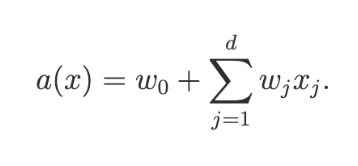



* Параметры модели – веса и коэффициент свободного сдвига (bias).
* Предсказание линейной модели есть линейная комбинация признаков. Иными словами, модель сводится к суммированию значений признаков с обучаемыми весами.

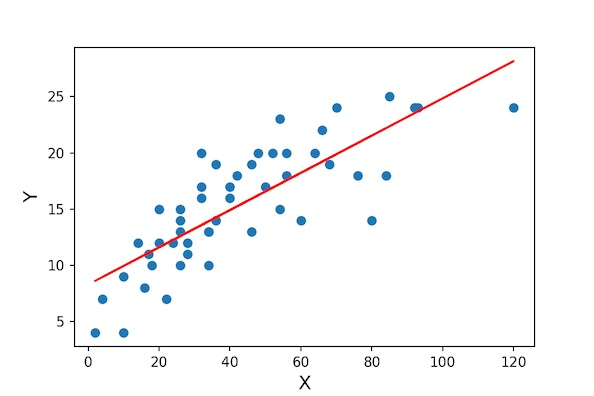

## Снова о данных

* Нормирование признаков: вычитание среднего и деление на дисперсию каждого столбца в матрице объектов-признаков.
* Линейные модели очень чувствительны к выбросам, т.е. объектам, которые не являются релевантными семплами в силу определенных или неизвестных причин.
* Некоторые признаки могут оказаться нерелевантными для решения задачи.  

## Функции потерь

Квадрат разности – основной способ измерить отклонение предсказания от истинного ответа.

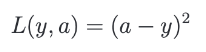

### Mean Squared Error (MSE)

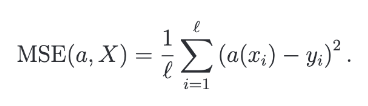

* Плохая интерпретируемость величины среднеквадратичного отклонения (например, квадратные рубли в задаче предсказания стоимости аренды квартиры).
* Функция MSE хороша для сравнения двух моделей или для контроля качества во время обучения. Однако она не всегда позволяет понять, насколько хорошую модель мы обучили (нужно учитывать природу объектов, с которыми мы работаем).

### Root Mean Squared Error (RMSE)
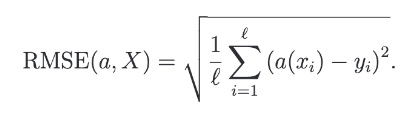

* Квадратный рубль становится родным круглым рублем.

### R^2 (Коэффициент детерминации)
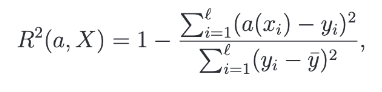

* Можно сказать, что мы нормируем среднеквадратичную ошибку наших предсказаний на разброс целевой переменной (дисперсия).
* Зачем? Мы можем интерпретировать зависимость признаков и целевой переменной. Чем ближе к 1, тем лучше.

### Mean Absolute Error (MAE)
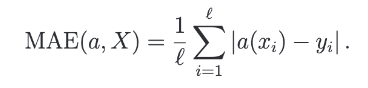

* Менее чувствителен к выбросам по сравнению с MSE/RMSE.

### Другие функции ошибок

Относительная ошибка (например, прогнозирование спроса)

* Mean Absolute Percentage Error (MAPE).
* Symmetric Mean Absolute Percentage Error (SMAPE).



## Регуляризация

* В ряде случаев, например, когда признаков больше, чем объектов, или признаки коррелируют между собой, задача минимизации функции ошибки может иметь бесконечное число решений.
* Большинство таких решений в пространстве вариантов являются переобучением и могут очень плохо работать на тестовых данных.

### Почему?

* Предположим, что в нашей выборке есть линейно зависимые признаки. Тогда существует такой вектор ```v```, что для любого объекта ```x``` в матрице объектов-признаков скалярное произведение ```<v, x>``` равно 0.

* Мы обучили модель ```w``` и считаем, что это оптимальное решение.

* Возьмем ```w``` и прибавим вектор ```v``` (который обеспечивает линейную зависимость), умноженный на какой-то коэффициент ```a```.

* Давайте посчитаем скалярное произведение этой штуки на объект ```x```: ```<w + a * v, x> = <w, x> + a * <v, x> = <w, x>```, поскольку ```<v, x>``` есть 0.

* Что это означает? Если мы имеем вектор весов (или матрицу), то при линейно зависимых признаках мы можем прибавить к нему любой вектор ```v``` и получить *такой же* ответ на других объектах ```x_i```.

* А что это означает? Это означает, что значение MSE останется тем же и считается оптимальным. А значит и модель остается оптимальной, когда предсказывает *те же* ответы. Учитывая, что коэффициент ```a``` тоже может быть разным (как и наши веса ```w```), мы получаем бесконечное количество вариантов.

* Получается, наша модель будет очень чувствительна к крайне маленьким изменениям в признаках объекта –> переобучена.

### Как жить в бесконечном пространстве вариантов?
* Регуляризация – штраф за большие веса для каких-либо признаков.

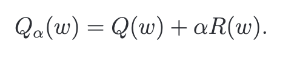

* С использованием регуляризации задача обучения модели сводится к минимизации суммы функции ошибок и штрафа. 

* О чем говорит коэффициент альфа? 

-- Если мы берем большой коэффициент, нам важнее, чтобы обучаемые веса ```w``` были меньше (то есть модель проще). Ожидается, что модель может восстанавливать более сложные зависимости в данных.

-- Если мы берем низкий коэффициент, мы больше адаптируемся под обучающую выборку. Наша модель будет бояться ошибиться – значит может оказаться переобученной.

* Коэффициент альфа – гиперпараметр модели, который подбирается по тестовой выборке или кросс-валидации.

* Существует 2 регуляризатора (L2 и L1):

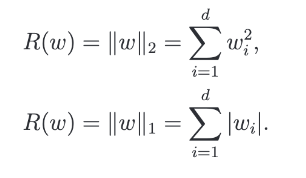

###  О чем нужно помнить на данном этапе?

* L1 позволяет отбирать признаки, так как его использование приводит к занулению части весов, так как строит разреженную модель, то есть такую, которая зависит не от всех, а от k признаков.
* При использовании L2 регуляризации решение всегда будет единственным.
* Гиперпараметр подбирается не моделью, а путем экспериментов.

### [Более подробно](https://habr.com/ru/company/ods/blog/323890/)

### Что по текстам?

Предсказание вероятности покупки товара
https://www.kaggle.com/c/avito-demand-prediction

Можно скачать [тут](https://yadi.sk/d/9GtU4vp_MMsBDw).

In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [4]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [13]:
import pandas as pd


data = pd.read_csv('train.csv.zip')
data.dropna(subset=['description'], inplace=True)

In [14]:
data.shape

(1387148, 18)

In [22]:
data = data.sample(2500)
data.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,text_len
1153607,fd674f5ff77b,8754b87c5c0b,Свердловская область,Верхняя Пышма,Бытовая электроника,Аудио и видео,"Акустика, колонки, сабвуферы",NaN,NaN,Акустическая система Ultimate Stage TR 35,-Назначение: фронтальный громкоговоритель /\n-...,5000.0,1,2017-03-25,Private,333002e5e51bcc18d336bae4446f425b8a06628d742cad...,3030.0,0.00000,401
694346,d55b2d035871,c0707082becc,Тульская область,Новомосковск,Личные вещи,Детская одежда и обувь,Для мальчиков,Трикотаж,62-68 см (2-6 мес),Комплект 62-68 см,В отличном состоянии с пищалкой,200.0,5,2017-03-16,Private,6dc85648b4c33986f9ba3496d390da498a6f8ee09a1401...,63.0,0.00000,31
294145,50750f3f6ede,5dfa65affb7b,Краснодарский край,Мостовской,Транспорт,Грузовики и спецтехника,Автобусы,NaN,NaN,Паз 3203 (2013г.в),Продаётся Паз 3203 в хорошем состояние . Бензи...,1000000.0,32,2017-03-19,Private,cdf9a486908fa134f68cd6f5ef8c1f1a72648a4dbe432e...,1082.0,0.00000,80
1337074,3b5a7d6d4824,824c982e7dc5,Ставропольский край,Ставрополь,Личные вещи,Часы и украшения,Ювелирные изделия,NaN,NaN,Золотые кольца,"Продаю золотые красивые кольца,сделаю от цены ...",5000.0,3,2017-03-19,Private,11ed26b825d6efc8b69194f0dc7c891cda7fb6a6a8be42...,23.0,0.23393,176
745755,749513091647,cac1c14fa87d,Красноярский край,Красноярск,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,74-80 см (7-12 мес),Парка на синтепоне,"Парка отличного качества, одевали пару раз, ле...",1050.0,22,2017-03-27,Private,5498f24755095effb2d6c6505ce9fc51bc4368487352ac...,53.0,0.00000,91


In [23]:
data.parent_category_name.value_counts(normalize=True)

Личные вещи            0.4632
Для дома и дачи        0.1156
Бытовая электроника    0.1072
Недвижимость           0.0972
Хобби и отдых          0.0612
Транспорт              0.0600
Услуги                 0.0544
Животные               0.0296
Для бизнеса            0.0116
Name: parent_category_name, dtype: float64

In [24]:
data.region.value_counts(normalize=True)

Краснодарский край         0.1068
Ростовская область         0.0644
Свердловская область       0.0560
Челябинская область        0.0556
Татарстан                  0.0528
Самарская область          0.0500
Нижегородская область      0.0472
Башкортостан               0.0460
Новосибирская область      0.0460
Саратовская область        0.0368
Красноярский край          0.0332
Волгоградская область      0.0328
Иркутская область          0.0316
Пермский край              0.0308
Кемеровская область        0.0304
Алтайский край             0.0276
Ставропольский край        0.0268
Омская область             0.0268
Ярославская область        0.0260
Воронежская область        0.0232
Тюменская область          0.0208
Ханты-Мансийский АО        0.0196
Удмуртия                   0.0192
Калининградская область    0.0192
Владимирская область       0.0188
Белгородская область       0.0184
Оренбургская область       0.0172
Тульская область           0.0160
Name: region, dtype: float64

### Попробуем поработать с текстами.

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# как хорошо мы предсказываем, если наше предсказание случайно?

y_train, y_test = train_test_split(data.deal_probability, train_size=0.8, shuffle=True, random_state=42)

random_prediction = np.random.rand(len(y_test))

In [32]:
# MSE

mean_squared_error(y_test, random_prediction)

0.27915145465494745

In [33]:
# RMSE 

np.sqrt(mean_squared_error(y_test, random_prediction))

0.5283478538377415

In [28]:
data['text_len'] = data['description'].apply(len)
data['text_len_tokens'] = data['description'].apply(lambda x: len(x.split()))
data['number_of_caps'] = data['description'].apply(lambda x: len([ch for ch in x if ch.isupper()]))
data['number_of_nonalphanum'] = data['description'].apply(lambda x: len([ch for ch in x if not ch.isalnum()]))

In [29]:
X = data[['text_len', 'text_len_tokens', 'number_of_caps', 'number_of_nonalphanum']].values
y = data.deal_probability.values

In [30]:
# размерность матрицы объектов-признаков

X.shape

(2500, 4)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Базовые линейные модели регрессии

* LinearRegression
* Ridge – модель регрессии на основе понижения размерности. Применяется для борьбы с мультиколлинеарностью (когда независимые переменные коррелируют друг с другом).
* Lasso – похожа на Ridge, но позволяет выбрать важные предикторы за счет L1-регуляризации.


In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


reg = Ridge(alpha=1)
reg.fit(X_train, y_train)
x_pred = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, x_pred))

0.256247550605139

### Что скажет коэффициент детерминации?

In [37]:
from sklearn.metrics import r2_score


r2_score(y_test, preds)

-0.0006701534232382844

### А для константной модели?

In [41]:
const = 0.25
constant_preds = np.full(y_test.shape[0], const)

In [42]:
r2_score(y_test, constant_preds)

-0.1924490057064625

### Задание

1) Взять подвыборку из 120 000 примеров.

2) Векторизовать тексты с помощью CountVectorizer, TfidfVectorizer.

3) Если есть проблемы с RAM, можно воспользоваться ```sklearn.linear_model.SGDRegressor```.

4) Какие текстовые признаки мы можем извлечь/конструировать? Почему эти признаки полезны для предсказания вероятности покупки?

5) Зафиксируйте качество, полученное на подвыборке, в качестве бейзлайна. Насколько удалось его повысить? Как?